In [9]:
!pip install scikit-learn graphviz pydotplus seaborn


In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import pydotplus
from IPython.display import Image


In [11]:
url = "https://gist.githubusercontent.com/DiogoRibeiro7/c6590d0cf119e87c39e31c21a9c0f3a8/raw/PlayTennis.csv"
df = pd.read_csv(url)

print("Dataset Loaded:")
display(df)


Dataset Loaded:


,Outlook,Temperature,Humidity,Wind,Play Tennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes



--- DATA INFO ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Outlook      14 non-null     object
 1   Temperature  14 non-null     object
 2   Humidity     14 non-null     object
 3   Wind         14 non-null     object
 4   Play Tennis  14 non-null     object
dtypes: object(5)
memory usage: 692.0+ bytes
None

--- SUMMARY ---
       Outlook Temperature Humidity  Wind Play Tennis
count       14          14       14    14          14
unique       3           3        2     2           2
top      Sunny        Mild     High  Weak         Yes
freq         5           6        7     8           9

--- MISSING VALUES ---
Outlook        0
Temperature    0
Humidity       0
Wind           0
Play Tennis    0
dtype: int64


KeyError: 'PlayTennis'

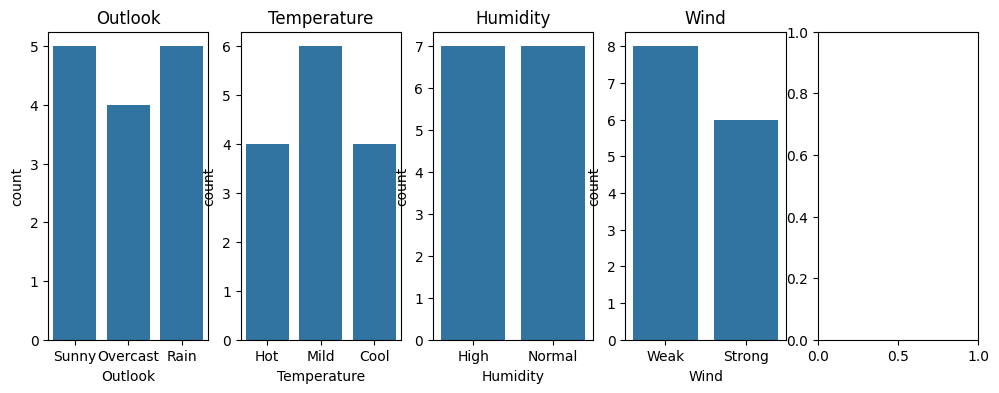

In [12]:
print("\n--- DATA INFO ---")
print(df.info())

print("\n--- SUMMARY ---")
print(df.describe(include='all'))

print("\n--- MISSING VALUES ---")
print(df.isnull().sum())

# Countplots
plt.figure(figsize=(12,4))
columns = ['Outlook', 'Temperature', 'Humidity', 'Wind', 'PlayTennis']

for i, col in enumerate(columns, 1):
    plt.subplot(1, 5, i)
    sns.countplot(x=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()


In [14]:
from sklearn.preprocessing import LabelEncoder


In [15]:
print("Original columns:", list(df.columns))
df.columns = df.columns.str.strip()  # remove leading/trailing spaces
print("Normalized columns:", list(df.columns))

Original columns: ['Outlook', 'Temperature', 'Humidity', 'Wind', 'Play Tennis', 'outlook_enc', 'temp_enc', 'humidity_enc', 'wind_enc']
Normalized columns: ['Outlook', 'Temperature', 'Humidity', 'Wind', 'Play Tennis', 'outlook_enc', 'temp_enc', 'humidity_enc', 'wind_enc']


In [22]:
def find_col(df, *candidates):
    lower_map = {c.lower(): c for c in df.columns}  # map lowercase->actual
    for cand in candidates:
        if cand is None:
            continue
        key = cand.lower().strip()
        if key in lower_map:
            return lower_map[key]
    return None

In [23]:
col_outlook   = find_col(df, "Outlook")
col_temp      = find_col(df, "Temperature", "Temp")
col_humidity  = find_col(df, "Humidity")
col_wind      = find_col(df, "Wind", "Windy")
col_play      = find_col(df, "PlayTennis", "Play Tennis", "Play", "play")

In [24]:
missing = {k:v for k,v in {
    "Outlook": col_outlook,
    "Temperature": col_temp,
    "Humidity": col_humidity,
    "Wind": col_wind,
    "Play/Target": col_play
}.items() if v is None}

if missing:
    raise KeyError(f"Missing expected columns (not found): {list(missing.keys())}. "
                   f"Detected columns: {list(df.columns)}")

In [25]:
le = LabelEncoder()

df['outlook_enc']  = le.fit_transform(df[col_outlook])
df['temp_enc']     = le.fit_transform(df[col_temp])
df['humidity_enc'] = le.fit_transform(df[col_humidity])
df['wind_enc']     = le.fit_transform(df[col_wind])
df['play_enc']     = le.fit_transform(df[col_play])

print("\nEncoded columns added: outlook_enc, temp_enc, humidity_enc, wind_enc, play_enc")
display(df.head())


Encoded columns added: outlook_enc, temp_enc, humidity_enc, wind_enc, play_enc


,Outlook,Temperature,Humidity,Wind,Play Tennis,outlook_enc,temp_enc,humidity_enc,wind_enc,play_enc
0,Sunny,Hot,High,Weak,No,2,1,0,1,0
1,Sunny,Hot,High,Strong,No,2,1,0,0,0
2,Overcast,Hot,High,Weak,Yes,0,1,0,1,1
3,Rain,Mild,High,Weak,Yes,1,2,0,1,1
4,Rain,Cool,Normal,Weak,Yes,1,0,1,1,1


In [26]:
X = df[['outlook_enc', 'temp_enc', 'humidity_enc', 'wind_enc']]
y = df['play_enc']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [27]:
models = {
    "Gini": DecisionTreeClassifier(criterion='gini'),
    "Entropy": DecisionTreeClassifier(criterion='entropy'),
    "LogLoss": DecisionTreeClassifier(criterion='log_loss'),
}

for name, model in models.items():
    print("\n==============================")
    print(f"MODEL: {name}")
    print("==============================")

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))



MODEL: Gini
Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3


MODEL: Entropy
Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3


MODEL: LogLoss
Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy           

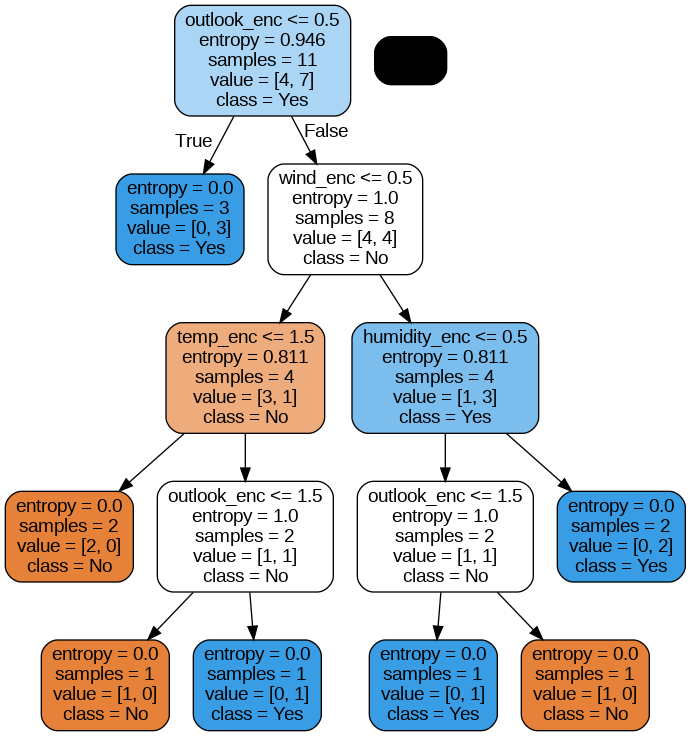

In [28]:
entropy_model = models["Entropy"]

dot_data = export_graphviz(
    entropy_model,
    out_file=None,
    feature_names=X.columns,
    class_names=["No", "Yes"],
    filled=True,
    rounded=True
)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())
